# CA03 Decision Tree Algorithm

Team 5: Mathia Quimpo, Matthew Chin

## 1. Data Source and Contents

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [3]:
# generating an excel output to aid in examining the data
df.to_excel("census_data.xlsx")

In [4]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


### Q1. Why does it makes sense to discretize columns for this problem?

Discretizing columns can simplify decision tree models by reducing the complexity of feature space, enhancing interpretability, potentially improving performance, and mitigating the impact of outliers.

### Q2. What might be the issues (if any) if we DID NOT discretize the columns?

Not discretizing columns may lead to issues such as loss of information, sensitivity to binning methods, and challenges in handling missing values which could affect model performance and interpretability.

## 2. Data Quality Analysis (DQA)

In [5]:
# check for missing values
missing_values =(df.isnull().sum())
missing_values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

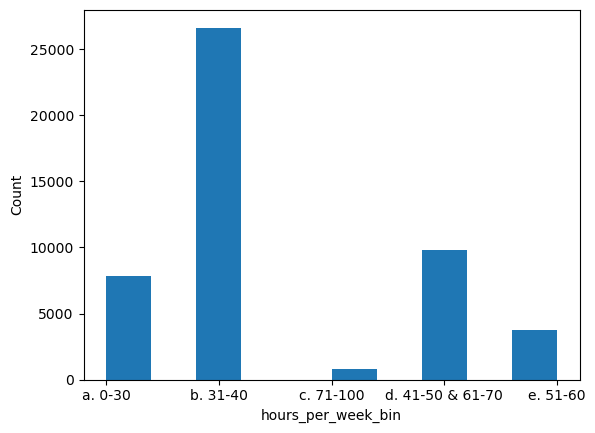

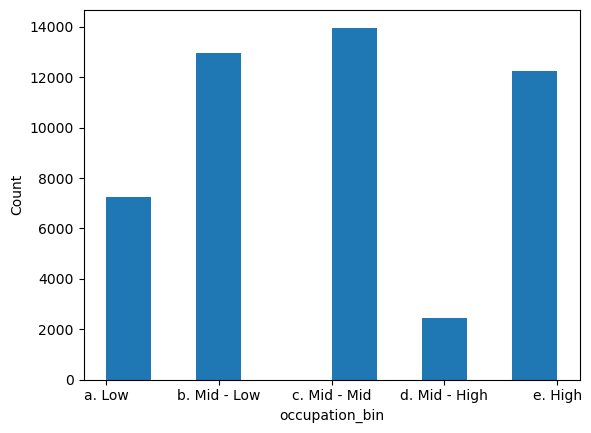

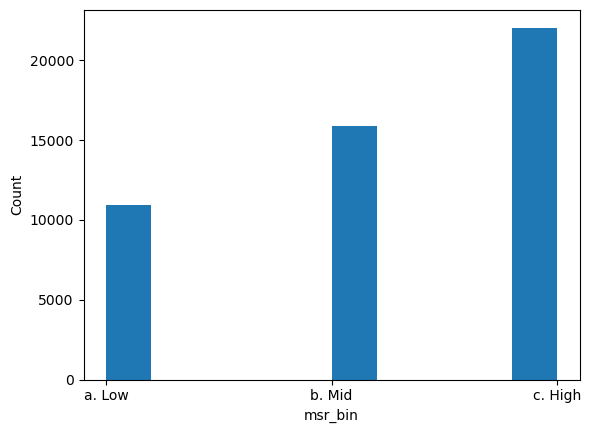

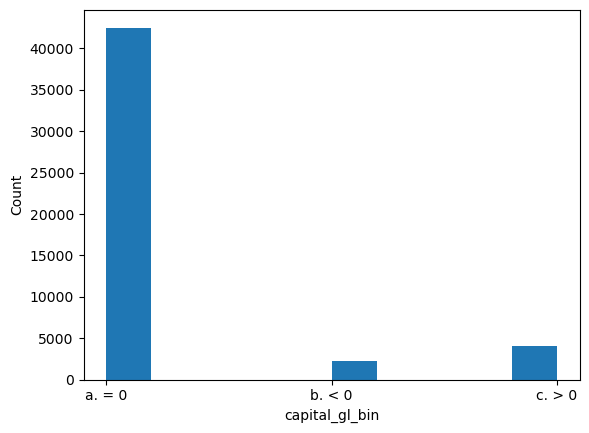

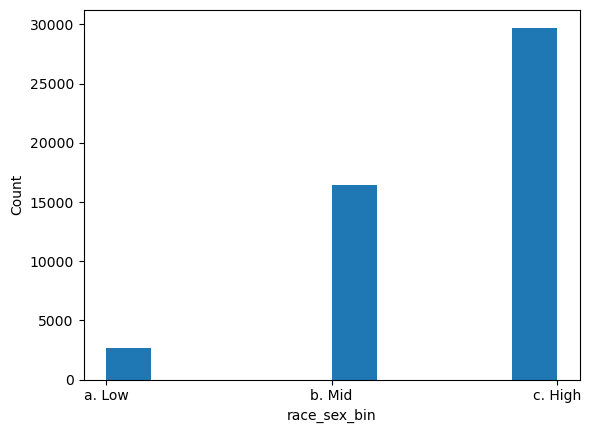

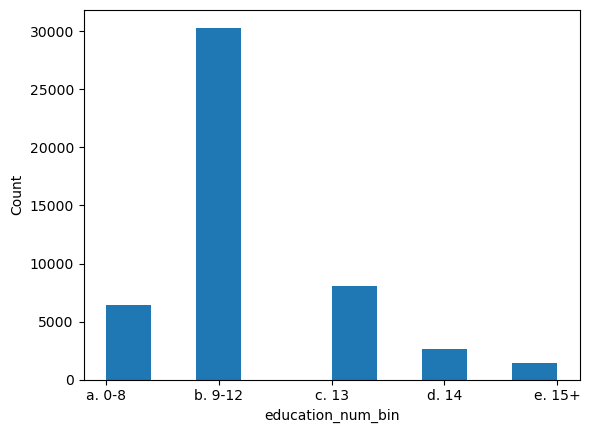

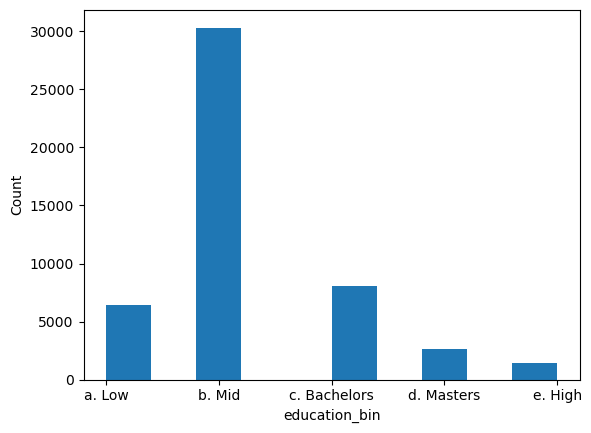

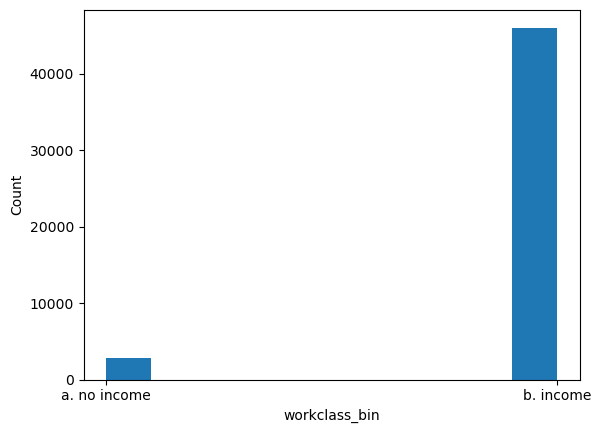

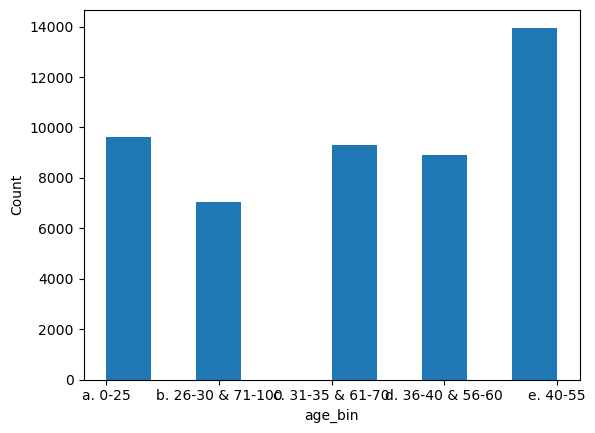

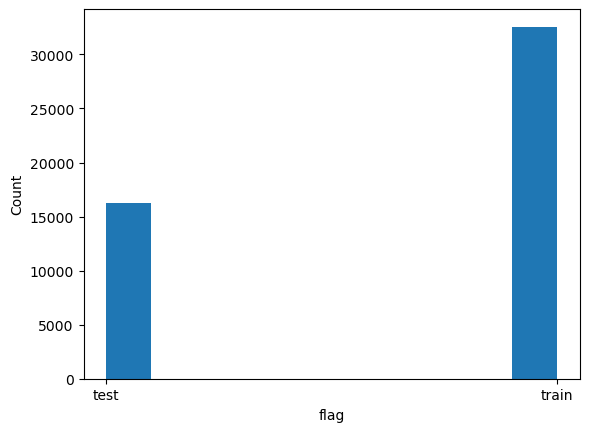

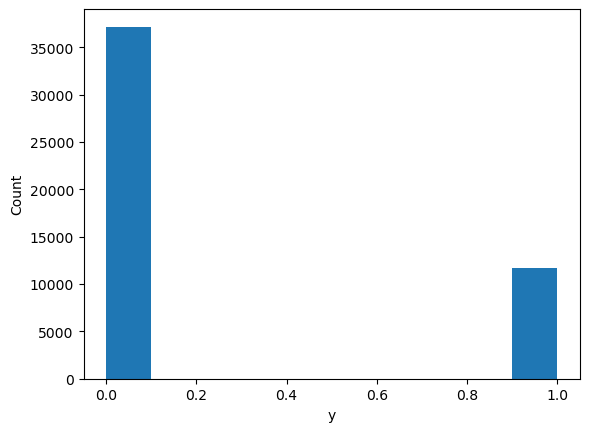

In [6]:
# use histogram to visualize outliers
for col in df:
    df.sort_values(by=col, inplace=True)
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [7]:
# display descriptive statistics of each column
df.describe(include='all')

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [8]:
def data_quality_report(df):

  # missing values
  missing_values_percentage = missing_values / df.shape[0] * 100

  # duplicate records
  duplicate_records = df[df.duplicated()]

  # Create a data quality report dataframe
  report = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing Values Percentage": missing_values_percentage,
    "Duplicate Records": duplicate_records.shape[0],
  })


# Create the data quality report
report = data_quality_report(df)

# Print the report
print(report)

None


## 3. Build Decision Tree Classifier Models

In [9]:
# separate train and test data
train = df[df['flag'] == 'train']
test = df[df['flag'] == 'test']

# save to csv file
train.to_csv('train.csv')
test.to_csv('test.csv')

In [10]:
from sklearn.preprocessing import OrdinalEncoder
def ordinal_encode(train_ordinal):
    """
    Ordinal encoding of the categorical features
    """
    ord_enc = OrdinalEncoder(dtype=int)
    enc_freq = ord_enc.fit_transform(train_ordinal)
    train_ordinal_encoded = pd.DataFrame(enc_freq, columns= train_ordinal.columns, index =train_ordinal.index)
    return train_ordinal_encoded

columns_to_encode = ['hours_per_week_bin', 
                     'occupation_bin', 
                     'msr_bin', 
                     'capital_gl_bin', 
                     'race_sex_bin', 
                     'education_num_bin', 
                     'education_bin', 
                     'workclass_bin', 
                     'age_bin'] 
x_train = ordinal_encode(train[columns_to_encode])
x_test = ordinal_encode(test[columns_to_encode])
y_train = train['y']
y_test = test['y']

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               max_features=None, min_samples_leaf=15)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

## 4. Evaluate Decision Tree Performance

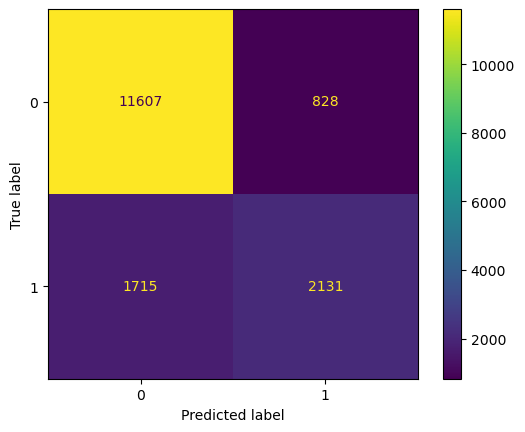

In [12]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
confusion_matrix.plot()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

# Calculate precision score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy Score: 0.8438056630428107
Precision: 0.7201757350456235
Recall: 0.5540821632865315
F1 Score: 0.6263041880969876


## 5. Tune Decision Tree Performance

In [14]:
# Define lists of hyperparameter values to iterate over
split_criteria_values = ['entropy', 'gini']
max_features_values = ['sqrt', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_samples_leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]
max_depth_values = [2, 4, 6 , 8, 10, 12, 14, 16]

In [15]:
# Initialize lists to store results for each run
results_run1 = []
results_run2 = []
results_run3 = []
results_run4 = []

### Q.3 Decision Tree Hyper-parameter variation vs. performance

In [16]:
# Run 1: Varying Split Criteria only
for split_criteria in split_criteria_values:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeClassifier(criterion=split_criteria, random_state=50)
    clf.fit(x_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(x_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results for Run 1
    results_run1.append({
        'split_criteria': split_criteria,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

In [17]:
# Run 2: Using the best hyperparameter value of Split Criteria from Run 1
best_split_criteria_run1 = max(results_run1, key=lambda x: x['accuracy'])['split_criteria']
for max_features in max_features_values:
    for min_samples_leaf in min_samples_leaf_values:
        for max_depth in max_depth_values:
            # Initialize and train the Decision Tree Classifier with best hyperparameters from Run 1
            clf = DecisionTreeClassifier(criterion=best_split_criteria_run1, max_features=max_features,
                                         min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=50)
            clf.fit(x_train, y_train)
            
            # Predict on the testing data
            y_pred = clf.predict(x_test)
            
            # Calculate performance metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            
            # Append results for Run 2
            results_run2.append({
                'max_features': max_features,
                'min_samples_leaf': min_samples_leaf,
                'max_depth': max_depth,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            })

In [18]:
# Run 3: Using the best hyperparameter values of Split Criteria and Minimum Sample Leaf from Run 1 & 2
best_min_samples_leaf_run2 = max(results_run2, key=lambda x: x['accuracy'])['min_samples_leaf']
for max_depth in max_depth_values:
    # Initialize and train the Decision Tree Classifier with best hyperparameters from Run 2
    clf = DecisionTreeClassifier(criterion=best_split_criteria_run1, max_features='sqrt',
                                 min_samples_leaf=best_min_samples_leaf_run2, max_depth=max_depth, random_state=50)
    clf.fit(x_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(x_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results for Run 3
    results_run3.append({
        'max_depth': max_depth,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

In [19]:
# Run 4: Using the best hyperparameter values from previous runs
best_max_depth_run3 = max(results_run3, key=lambda x: x['accuracy'])['max_depth']
for max_features in max_features_values:
    # Initialize and train the Decision Tree Classifier with best hyperparameters from Run 3
    clf = DecisionTreeClassifier(criterion=best_split_criteria_run1, max_features=max_features,
                                 min_samples_leaf=best_min_samples_leaf_run2, max_depth=best_max_depth_run3, random_state=50)
    clf.fit(x_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(x_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results for Run 4
    results_run4.append({
        'max_features': max_features,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

In [20]:
# Convert results to pandas DataFrames
df_run1 = pd.DataFrame(results_run1)
df_run2 = pd.DataFrame(results_run2)
df_run3 = pd.DataFrame(results_run3)
df_run4 = pd.DataFrame(results_run4)

In [21]:
# Display tables
print("Run 1 Table:", df_run1)
print("\nRun 2 Table:", df_run2)
print("\nRun 3 Table:", df_run3)
print("\nRun 4 Table:", df_run4)

Run 1 Table:   split_criteria  accuracy  precision    recall  f1_score
0        entropy  0.836742   0.692358  0.555902  0.616671
1           gini  0.836742   0.692732  0.555122  0.616339

Run 2 Table:     max_features  min_samples_leaf  max_depth  accuracy  precision    recall  \
0           sqrt                 5          2  0.781033   0.548498  0.413157   
1           sqrt                 5          4  0.834715   0.700312  0.524961   
2           sqrt                 5          6  0.834961   0.702835  0.522101   
3           sqrt                 5          8  0.845587   0.711429  0.582683   
4           sqrt                 5         10  0.844174   0.707580  0.580083   
..           ...               ...        ...       ...        ...       ...   
507          0.8                40          8  0.846201   0.716312  0.577743   
508          0.8                40         10  0.843806   0.719139  0.555902   
509          0.8                40         12  0.843929   0.716274  0.561882   

In [22]:
from sklearn.tree import plot_tree

# Best hyperparameters from the four runs
best_hyperparameters = {
    'criterion': 'entropy',
    'max_features': 0.6,
    'min_samples_leaf': 5,
    'max_depth': 8
}

# Train the decision tree classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_hyperparameters, random_state=50)
best_clf.fit(x_train, y_train)

# Predict on the testing data
y_pred = best_clf.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Performance Metrics:
Accuracy: 0.8446655610834716
Precision: 0.7189890256069172
Recall: 0.5621424856994279
F1 Score: 0.6309645410769007


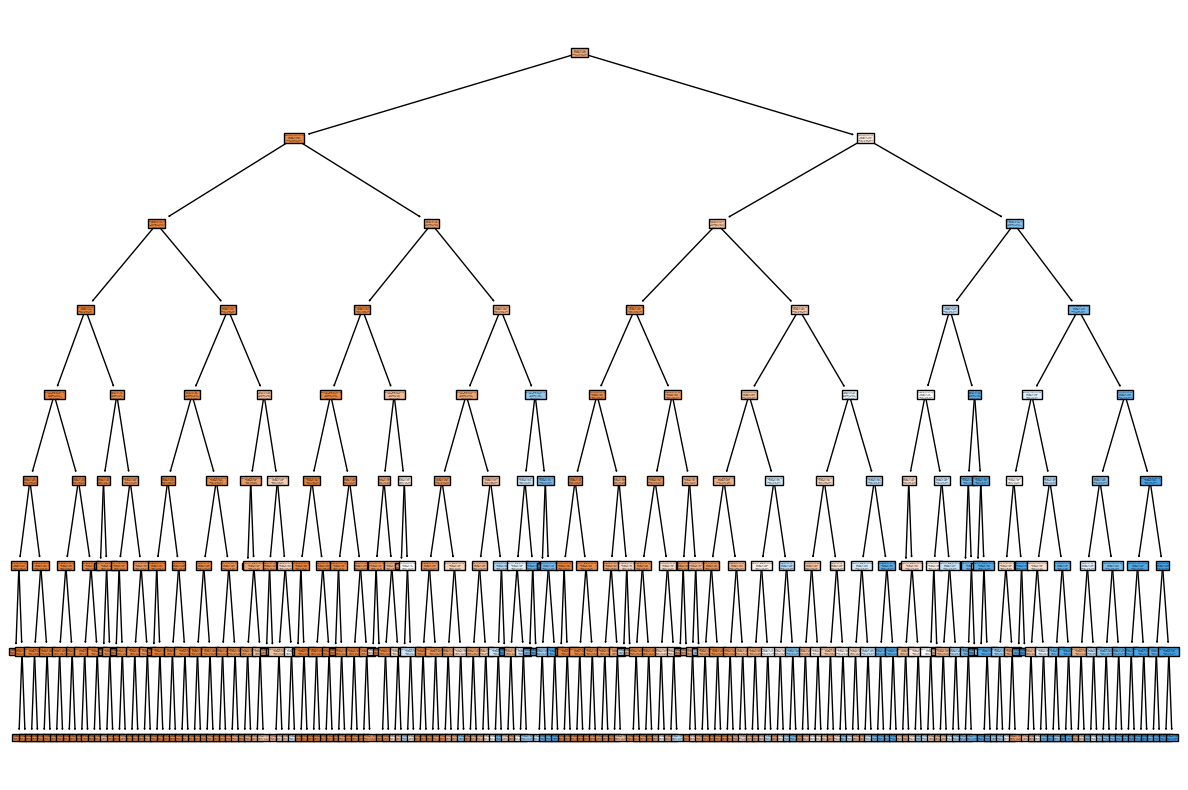

In [23]:
# Convert feature names from Index to list
feature_names_list = x_train.columns.tolist()

# Visualize the decision tree using plot_tree function
plt.figure(figsize=(15, 10))
plot_tree(best_clf, feature_names=feature_names_list, class_names=['<=50K', '>50K'], filled=True)
plt.show()

## 7. Conclusion

### Q.4 How long was your total run time to train the best model?

In [34]:
import time

# Record start time
start_time = time.time()

# Train the decision tree classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_hyperparameters, random_state=50)
best_clf.fit(x_train, y_train)

# Record end time
end_time = time.time()

# Calculate total runtime
total_runtime = end_time - start_time
print("Total runtime for training the best model:", total_runtime, "seconds")

Total runtime for training the best model: 0.044879913330078125 seconds


### Q.5 Did you find the BEST TREE?

Yes, run 4 provided the best tree with accuracy of 0.845157 and max_features of 0.8.

### Q.6 Write your observations from the visualization of the best tree:

### Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)

## 8. Prediction using your “trained” Decision Tree Model

In [33]:
# Load the training data to get column names and encoding
train = pd.read_csv('train.csv')

# Define the information for the new individual
new_data = {
    'hours_per_week': 48,
    'occupation': 'Mid-Low',
    'marital_status': 'High',
    'capital_gain': 'Yes',
    'race_sex': 'Mid',
    'education_num': 12,
    'education': 'High',
    'workclass': 'Income',
    'age': 58
}

# Create a DataFrame with the new individual's information
new_df = pd.DataFrame([new_data])

# Apply the same preprocessing steps as done during training
columns_to_encode = ['hours_per_week_bin', 
                     'occupation_bin', 
                     'msr_bin', 
                     'capital_gl_bin', 
                     'race_sex_bin', 
                     'education_num_bin', 
                     'education_bin', 
                     'workclass_bin', 
                     'age_bin'] 

# Apply ordinal encoding to the new data
new_df_encoded = ordinal_encode(new_df[columns_to_encode])

# Use the trained model to make predictions
prediction = best_clf.predict(new_df_encoded)

# Print the predicted income category
print("Predicted Income Category:", prediction[0])

KeyError: "None of [Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',\n       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',\n       'age_bin'],\n      dtype='object')] are in the [columns]"

### Q.8 What is the probability that your prediction for this person is correct?